# Forecasting aircraft Take-Off weight


### Exploratory Data Analysis (EDA)

To begin with, I am going to read the data using pandas library

In [57]:
#Read the data

import pandas as pd

data = pd.read_csv('bitaskpartA__2_train.csv' , sep=',')


Now, I can glance the data

In [58]:
data

,DepartureDate,DepartureYear,DepartureMonth,DepartureDay,FlightNumber,DepartureAirport,ArrivalAirport,Route,ActualFlightTime,ActualTotalFuel,ActualTOW,FLownPassengers,BagsCount,FlightBagsWeight
0,01/10/2016,2016,10,1,1145,MAN,SXF,MAN-SXF,91,3660,64016,175,61,440
1,01/10/2016,2016,10,1,1160,CTA,FCO,CTA-FCO,68,3280,66138,182,27,350
2,01/10/2016,2016,10,1,1183,LGW,SNN,LGW-SNN,64,2720,58447,127,(null),(null)
3,01/10/2016,2016,10,1,1220,ATH,CHQ,ATH-CHQ,35,1682,60587,163,12,150
4,01/10/2016,2016,10,1,1225,CHQ,ATH,CHQ-ATH,34,1877,63090,178,37,490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29726,15/10/2016,2016,10,15,9833,PMI,HHN,PMI-HHN,102,4880,66247,177,96,1250
29727,15/10/2016,2016,10,15,9862,LPL,AGP,LPL-AGP,163,6890,67898,185,107,1390
29728,15/10/2016,2016,10,15,9863,AGP,LPL,AGP-LPL,145,6322,66247,172,64,830
29729,15/10/2016,2016,10,15,9948,FAO,ORK,FAO-ORK,132,5880,68224,183,82,1090


The main problem that I could see here is that it has a different way to name the missing values. Likely, the computer can't recognize them as a missing values thus we need to change them for the right missing values.

In [59]:
import numpy as np

data = data.replace('(null)' , np.nan)   #We have a strange missing calue (null)


It is the time to make a happy idea or just take a decission. Although, a accurate forecasting may be reached with the combination of other features I have decided to choose some features due to the impact that probably they give to the main variable. For example:

* **FlightNumber:** Probably, this feature is less correlated with the weight of the plane than others.
* **Route:** I could have done a label encoder to the string but the route shouldn't imply more or less weight.
* **ActualFlightTime:** Most difficult decission. However, maybe in a long business journey you needn't a lot of bags.

In [60]:
#We should choose the neccesary data for forecasting the ActualTOW

Data = pd.concat([data['ActualTOW'] , data['FLownPassengers'] , data['BagsCount'] , data['FlightBagsWeight'] , data['ActualTotalFuel']] , axis=1)

It goes without saying that the features chosen are very correlated to the target variable:

* **FLownPassengers:** more passengers always is the same to more weight in the plane.
* **BagsCount and FlightBagsWeight:** Bags are objects so they have a weight.
* **ActualTotalFuel**: I would need to ask if this is the spent fuel during the trip. However, I am going to suposse a yes, thus, It is known that if you have to move more weight you will spend more fuel.

In [61]:
Data

,ActualTOW,FLownPassengers,BagsCount,FlightBagsWeight,ActualTotalFuel
0,64016,175,61,440,3660
1,66138,182,27,350,3280
2,58447,127,NaN,NaN,2720
3,60587,163,12,150,1682
4,63090,178,37,490,1877
...,...,...,...,...,...
29726,66247,177,96,1250,4880
29727,67898,185,107,1390,6890
29728,66247,172,64,830,6322
29729,68224,183,82,1090,5880


See some stadistics

In [62]:
#See the data

description = Data.describe()
print('\nThe description of the data is:' , description)

information = Data.info()
print('\nThe information of the data is:' , information)


The description of the data is:        ActualTotalFuel
count     29731.000000
mean       4782.483536
std        2069.865460
min         600.000000
25%        3210.000000
50%        4530.000000
75%        6010.000000
max       17890.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29731 entries, 0 to 29730
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ActualTOW         29298 non-null  object
 1   FLownPassengers   29636 non-null  object
 2   BagsCount         27447 non-null  object
 3   FlightBagsWeight  27253 non-null  object
 4   ActualTotalFuel   29731 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.1+ MB

The information of the data is: None


They are numeric variable so it would be neccesary to deal with them as numbers

In [63]:
#change data type to numeric

Data['ActualTOW'] = pd.to_numeric(Data['ActualTOW'])
Data['FLownPassengers'] = pd.to_numeric(Data['FLownPassengers'])
Data['BagsCount'] = pd.to_numeric(Data['BagsCount'])
Data['FlightBagsWeight'] = pd.to_numeric(Data['FlightBagsWeight'])

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29731 entries, 0 to 29730
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ActualTOW         29298 non-null  float64
 1   FLownPassengers   29636 non-null  float64
 2   BagsCount         27447 non-null  float64
 3   FlightBagsWeight  27253 non-null  float64
 4   ActualTotalFuel   29731 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.1 MB


In [64]:
#Now We can describe te Data correctly

Data.describe()

,ActualTOW,FLownPassengers,BagsCount,FlightBagsWeight,ActualTotalFuel
count,29298.000000,29636.000000,27447.000000,27253.000000,29731.000000
mean,65031.246638,167.268626,45.417022,573.618464,4782.483536
std,3339.385728,20.177527,32.797217,376.524581,2069.865460
min,42991.000000,4.000000,1.000000,3.000000,600.000000
25%,63127.000000,163.000000,23.000000,300.000000,3210.000000
50%,65122.000000,173.000000,39.000000,490.000000,4530.000000
75%,67154.000000,179.000000,62.000000,780.000000,6010.000000
max,74283.000000,189.000000,1180.000000,10530.000000,17890.000000


Missing values usually are in the majority real datasets. Loads of techniques can be used to deal with them. In this case, I am going to use the mean of the column to fill the missing values due to the fact that as a second objective I want to do the code as simpler as possible to save computational space.

In [65]:
#Have we got missing values?

count_NA = Data.isnull().sum()
print('\nThe number of missing values is:' ,
      count_NA)

#We can fill them with the mean
Data = Data.apply(lambda x: x.fillna(x.mean()),axis=0)

#Another count

count_NA2 = Data.isnull().sum()

print('\nNow, the numbber of missing values is:' ,
      count_NA2)



The number of missing values is: ActualTOW            433
FLownPassengers       95
BagsCount           2284
FlightBagsWeight    2478
ActualTotalFuel        0
dtype: int64

Now, the numbber of missing values is: ActualTOW           0
FLownPassengers     0
BagsCount           0
FlightBagsWeight    0
ActualTotalFuel     0
dtype: int64


In [66]:
#Reassignement of the variables for easy plotting

y = Data['ActualTOW']
x1 = Data['FLownPassengers']
x2 = Data['BagsCount']
x3 = Data['FlightBagsWeight']
x4 = Data['ActualTotalFuel']

It is time to see the variables:

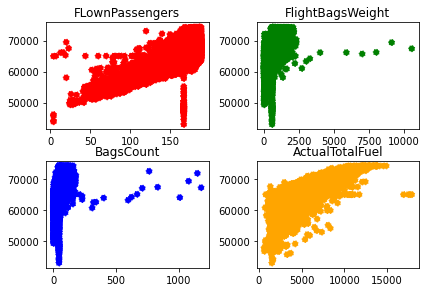

In [67]:
import matplotlib.pyplot as plt

#First Viz

fig, ax = plt.subplots(2, 2)
plt.tight_layout()

ax[0,0].scatter(x1,y , color= 'red' , linestyle= 'dotted')
ax[0,0].set_title('FLownPassengers')


ax[1,0].scatter(x2,y , color= 'blue' , linestyle= 'dotted')
ax[1,0].set_title('BagsCount')


ax[0,1].scatter(x3,y , color= 'green' , linestyle= 'dotted')
ax[0,1].set_title('FlightBagsWeight')


ax[1,1].scatter(x4,y , color= 'orange' , linestyle= 'dotted')
ax[1,1].set_title('ActualTotalFuel')


plt.show()

I can see that the variables has outliers. They are data without sense and they usually are out of the main distribution. Again, loads of techniques exist to deal with them. From regression models to simple queries. In thi scase, I am going to use a query as a filter

In [68]:
#We need to deal with the outliers

Data=Data.query('FLownPassengers > 25')
Data=Data.query('BagsCount < 200')
Data = Data.query('FlightBagsWeight < 2250')
Data = Data.query('ActualTotalFuel < 15000')


In [69]:
#Reassignement of the variables for easy plotting

y = Data['ActualTOW']
x1 = Data['FLownPassengers']
x2 = Data['BagsCount']
x3 = Data['FlightBagsWeight']
x4 = Data['ActualTotalFuel']

Repeat the visualization

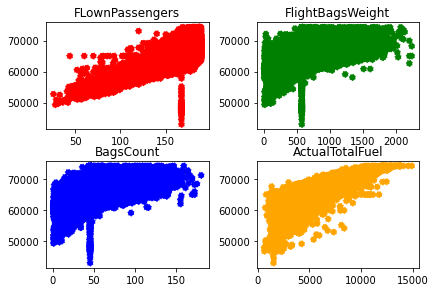

In [70]:
#Second Viz

fig, ax = plt.subplots(2, 2)
plt.tight_layout()

ax[0,0].scatter(x1,y , color= 'red' , linestyle= 'dotted')
ax[0,0].set_title('FLownPassengers')


ax[1,0].scatter(x2,y , color= 'blue' , linestyle= 'dotted')
ax[1,0].set_title('BagsCount')


ax[0,1].scatter(x3,y , color= 'green' , linestyle= 'dotted')
ax[0,1].set_title('FlightBagsWeight')


ax[1,1].scatter(x4,y , color= 'orange' , linestyle= 'dotted')
ax[1,1].set_title('ActualTotalFuel')


plt.show()

Some outliers are still there. But, they are concentrated in the lower values of  *ActualTOW* variable. Most likely, the company are worried about high values of weight so It wouldn't be incorrect to filter the lower values.

In [71]:
Data = Data.query('ActualTOW > 55000')          #deal with outliers       

In [72]:
#Reassignement of the variables for easy plotting

y = Data['ActualTOW']
x1 = Data['FLownPassengers']
x2 = Data['BagsCount']
x3 = Data['FlightBagsWeight']
x4 = Data['ActualTotalFuel']

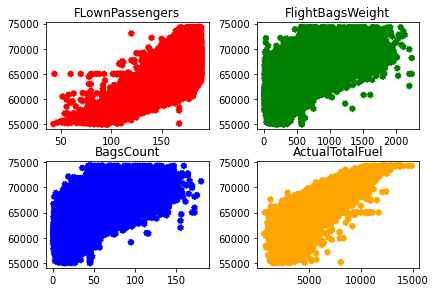

In [73]:
#Third Viz

fig, ax = plt.subplots(2, 2)
plt.tight_layout()

ax[0,0].scatter(x1,y , color= 'red' , linestyle= 'dotted')
ax[0,0].set_title('FLownPassengers')


ax[1,0].scatter(x2,y , color= 'blue' , linestyle= 'dotted')
ax[1,0].set_title('BagsCount')


ax[0,1].scatter(x3,y , color= 'green' , linestyle= 'dotted')
ax[0,1].set_title('FlightBagsWeight')


ax[1,1].scatter(x4,y , color= 'orange' , linestyle= 'dotted')
ax[1,1].set_title('ActualTotalFuel')


plt.show()

Now, the data are prepared to be modelled.

### Modelling

The first think to do is to define the target variable in other variable. Then, we can split the data in train and test

In [74]:
                                    #Make the model

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#We scale the data

X = Data.drop('ActualTOW' , axis = 1)   #Variable to train
y = Data['ActualTOW']

#Split into train and test

X_train, X_test, Y_train, Y_test= train_test_split(X,y, test_size= 0.2 ,
random_state= 2020 )


It is undeniable that the data has different range of values. For this reason, to scale the data is neccesary.

In [75]:
#Normalize the data

sc = StandardScaler()

Y_train = sc.fit_transform(Y_train.values.reshape(-1,1))
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
Y_test = sc.fit_transform(Y_test.values.reshape(-1,1))

I am going to test the accuracy of three regression models: Decission tree, Linear regression and Stochastic Gradient Descent regressor.


In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor



#Define the model

reg1 = DecisionTreeRegressor()
reg2 = LinearRegression()
reg3 = SGDRegressor()


reg1.fit(X_train,Y_train)
reg2.fit(X_train,Y_train)
reg3.fit(X_train,Y_train)

C:\Users\USER\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SGDRegressor()

#### Evaluation of the model

Let's see what are the best model and whether his accuracy can be considered optimal or not.

In [77]:
#R^2 error

print('-------------------DECISIOM TREE -------------')

print("\nR-Squared test Deccision Tree: " , reg1.score(X_test,Y_test))
print("R-Squared train Decision Tree:" , reg1.score(X_train,Y_train))

print('\n-------------------LINEAR REGRESSION ----------')

print("\nR-Squared test linear regression: " , reg2.score(X_test,Y_test))
print("R-Squared train linear regression:" , reg2.score(X_train,Y_train))

print('\n--------------------Stochastic Gradient Descent --------------')

print("\nR-Squared test SDG: " , reg3.score(X_test,Y_test))
print("R-Squared train SDC:" , reg3.score(X_train,Y_train))

-------------------DECISIOM TREE -------------

R-Squared test Deccision Tree:  0.7521730482639414
R-Squared train Decision Tree: 0.9995946146738379

-------------------LINEAR REGRESSION ----------

R-Squared test linear regression:  0.8803954930242357
R-Squared train linear regression: 0.8775987165808916

--------------------Stochastic Gradient Descent --------------

R-Squared test SDG:  0.880266224963034
R-Squared train SDC: 0.877547215064542


In [78]:
#RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

predict_test1= reg1.predict(X_test)   #evaluating the models
predict_test2= reg2.predict(X_test) 
predict_test3= reg3.predict(X_test) 

print('-------------------DECISIOM TREE -------------')

rmse1=sqrt(mean_squared_error(Y_test,predict_test1))
print("\nThe rmse is:" , rmse1)

print('\n-------------------LINEAR REGRESSION ----------')

rmse2=sqrt(mean_squared_error(Y_test,predict_test2))
print("\nThe rmse is:" , rmse2)

print('\n--------------------Stochastic Gradient Descent --------------')

rmse3=sqrt(mean_squared_error(Y_test,predict_test3))
print("\nThe rmse is:" , rmse3)


-------------------DECISIOM TREE -------------

The rmse is: 0.4978222089622545

-------------------LINEAR REGRESSION ----------

The rmse is: 0.34583884538288107

--------------------Stochastic Gradient Descent --------------

The rmse is: 0.3460256855162143


In [79]:
#R2 score with unnormalize data

from sklearn.metrics import r2_score


Y_test= sc.inverse_transform(Y_test)
predict_test1= sc.inverse_transform(predict_test1)
predict_test2= sc.inverse_transform(predict_test2)
predict_test3= sc.inverse_transform(predict_test3)

print('-------------------DECISIOM TREE -------------')

print( "\nR-Squared: {:5.2f} " .format(r2_score(Y_test, predict_test1)))

print('\n-------------------LINEAR REGRESSION ----------')

print( "\nR-Squared: {:5.2f} " .format(r2_score(Y_test, predict_test2)))

print('\n--------------------Stochastic Gradient Descent --------------')

print( "\nR-Squared: {:5.2f} " .format(r2_score(Y_test, predict_test3)))

-------------------DECISIOM TREE -------------

R-Squared:  0.75 

-------------------LINEAR REGRESSION ----------

R-Squared:  0.88 

--------------------Stochastic Gradient Descent --------------

R-Squared:  0.88 


As we can see linear model and SGD model have the best accuracy. However, the linear model has a better RMSE thus, it would be the best model

#### Visualization

In [80]:
import plotly.express as px
import plotly.graph_objects as go


#check the results

x_range = np.linspace(Y_test.min(), Y_test.max(), len(Y_test))
y_range = predict_test2.reshape(len(Y_test))


fig = px.scatter(Y_test , opacity = 0.65)
fig.add_traces(go.Scatter(y=y_range, name='Linear Regression Fit'))
fig['data'][0]['name']='ActualTOW'
fig.update_layout(
title = 'Fit',
yaxis_title='ActualTOW',
legend_title="Legend")


fig.show()







<img src = "conclusion.png" width = 1000>